Pré-processamento realizado em Processing.ipynb

# Bibliotecas

In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sp
from scipy import signal
import ml_time_series as mls
import timeit
from datetime import datetime
from sklearn.externals import joblib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import utils

%matplotlib inline  

In [2]:
entropy = []

def proccess_data(x,DATA,NUM_SAMPLES,LABEL):
    
    if "v" in x:
         Xc = np.load("preproc/stacked_v/"+x)
    else:
         Xc = np.load("preproc/stacked_t/"+x)
   
    print '\nXc initial shape ', Xc.shape
    
    #Principal component analysis
    pca = PCA(n_components=8)
    pca.fit(Xc)
    Xc = pca.transform(Xc)
    print pca.explained_variance_ratio_
    entropy.append(sum(pca.explained_variance_ratio_))
    print 'Xc PCA shape ', Xc.shape
    
    #Create temporal serie
    #Xc = mls.generate_envelope(Xc, NUM_SAMPLES)
    #print 'Xc temporal-serie shape ', Xc.shape
    
    #Labeling the PKS level    
    C = (np.ones(len(Xc))*LABEL).reshape((len(Xc),1))
    Xc = np.hstack((Xc.reshape(Xc.shape),C.reshape((len(Xc),1)))) 
    print 'Xc labeled shape ', Xc.shape
    
    # Salving in file on the folder </preproc/labeled>
    if "v" in x:
        np.save('./preproc/labeled_bv/'+x[:9]+'_tsl', Xc, allow_pickle=False)
        print '\n'+x[:9]+'_tsl'
        DATAv.append(x[:9]+'_tsl.npy')
    else:
        np.save('./preproc/labeled_bt/'+x[:8]+'_tsl', Xc, allow_pickle=False)
        print '\n'+x[:8]+'_tsl'
        DATA.append(x[:8]+'_tsl.npy')
        

In [3]:
#DATA_hs= files = os.listdir('preproc\stacked_t')
DATA_hs = os.listdir('C:\Users\jorge.junior\Documents\GitHub\PKS_ML\preproc\stacked_t')

In [4]:
#l=[2,2,2, 3,3,3, 4,4,4, 1,1,1, 2,2,2,2,2,2, 3,3,3, 4,4,4,4,4,4, 1,1,1,1,1,1]
l=[9,9,9, 9,9,9, 9,9,9, 1,1,1, 9,9,9,9,9,9, 9,9,9, 9,9,9,9,9,9, 1,1,1,1,1,1]

for x, y in zip(DATA_hs, l):
    print x[:8],y

pi06.1.1 9
pi06.1.2 9
pi06.1.3 9
pi07.2.1 9
pi07.2.2 9
pi07.2.3 9
pi09.1.1 9
pi09.1.2 9
pi09.1.3 9
pi17.1.1 1
pi17.1.2 1
pi17.1.3 1
pr06.1.1 9
pr06.1.2 9
pr06.1.3 9
pr06.2.1 9
pr06.2.2 9
pr06.2.3 9
pr07.1.1 9
pr07.1.2 9
pr07.1.3 9
pr09.1.1 9
pr09.1.2 9
pr09.1.3 9
pr09.2.1 9
pr09.2.2 9
pr09.2.3 9
pr17.1.1 1
pr17.1.2 1
pr17.1.3 1
pr17.2.1 1
pr17.2.2 1
pr17.2.3 1


In [5]:
#Grupo total
start = timeit.default_timer()

NUM_SAMPLES = 500
#l=[2,2,2, 3,3,3, 4,4,4, 1,1,1, 2,2,2,2,2,2, 3,3,3, 4,4,4,4,4,4, 1,1,1,1,1,1]
l=[9,9,9, 9,9,9, 9,9,9, 1,1,1, 9,9,9,9,9,9, 9,9,9, 9,9,9,9,9,9, 1,1,1,1,1,1]
DATA = []

for x, y in zip(DATA_hs, l):
    proccess_data(x,DATA,NUM_SAMPLES,y)
    
stop = timeit.default_timer()
ti = stop - start 
print ('Tempo total para o envelopamento: %.2f min' % (ti/60))


Xc initial shape  (4617L, 16L)
[0.70266675 0.13533794 0.09772733 0.03099862 0.02433168 0.00524991
 0.00254483 0.00105406]
Xc PCA shape  (4617L, 8L)
Xc labeled shape  (4617L, 9L)

pi06.1.1_tsl

Xc initial shape  (4617L, 16L)
[7.92391633e-01 9.74355769e-02 6.92129097e-02 2.04112117e-02
 1.56787831e-02 2.91264066e-03 1.26605524e-03 6.29596881e-04]
Xc PCA shape  (4617L, 8L)
Xc labeled shape  (4617L, 9L)

pi06.1.2_tsl

Xc initial shape  (4617L, 16L)
[9.18108081e-01 3.43028536e-02 2.50061872e-02 1.68807525e-02
 3.72872455e-03 1.19810659e-03 5.07704121e-04 2.50394841e-04]
Xc PCA shape  (4617L, 8L)
Xc labeled shape  (4617L, 9L)

pi06.1.3_tsl

Xc initial shape  (3951L, 16L)
[0.57906879 0.24182858 0.07123382 0.05140601 0.03818228 0.00852123
 0.00663139 0.00306768]
Xc PCA shape  (3951L, 8L)
Xc labeled shape  (3951L, 9L)

pi07.2.1_tsl

Xc initial shape  (3951L, 16L)
[0.45014805 0.31661577 0.09659891 0.06650448 0.04314308 0.01205164
 0.01047417 0.00438114]
Xc PCA shape  (3951L, 8L)
Xc labeled shap

In [6]:
#print min(entropy)
import heapq

elements = heapq.nsmallest(10, entropy)
elements

[0.9998240994264298,
 0.9998347367058654,
 0.9998479071796365,
 0.9998603737387222,
 0.9998632210559553,
 0.9998722232483349,
 0.9998727927219485,
 0.9998774484405439,
 0.9998808405551053,
 0.9998867086090623]

In [7]:
DATA[1:-2]

['pi06.1.2_tsl.npy',
 'pi06.1.3_tsl.npy',
 'pi07.2.1_tsl.npy',
 'pi07.2.2_tsl.npy',
 'pi07.2.3_tsl.npy',
 'pi09.1.1_tsl.npy',
 'pi09.1.2_tsl.npy',
 'pi09.1.3_tsl.npy',
 'pi17.1.1_tsl.npy',
 'pi17.1.2_tsl.npy',
 'pi17.1.3_tsl.npy',
 'pr06.1.1_tsl.npy',
 'pr06.1.2_tsl.npy',
 'pr06.1.3_tsl.npy',
 'pr06.2.1_tsl.npy',
 'pr06.2.2_tsl.npy',
 'pr06.2.3_tsl.npy',
 'pr07.1.1_tsl.npy',
 'pr07.1.2_tsl.npy',
 'pr07.1.3_tsl.npy',
 'pr09.1.1_tsl.npy',
 'pr09.1.2_tsl.npy',
 'pr09.1.3_tsl.npy',
 'pr09.2.1_tsl.npy',
 'pr09.2.2_tsl.npy',
 'pr09.2.3_tsl.npy',
 'pr17.1.1_tsl.npy',
 'pr17.1.2_tsl.npy',
 'pr17.1.3_tsl.npy',
 'pr17.2.1_tsl.npy']

---

In [8]:
#DATAv_hs= files = os.listdir('preproc\stacked_v')
DATAv_hs = os.listdir('C:\Users\jorge.junior\Documents\GitHub\PKS_ML\preproc\stacked_v')

In [9]:
#l=[2,2,2, 3,3,3, 4,4,4, 1,1,1, 2,2,2, 3,3,3, 4,4,4, 1,1,1]
l=[9,9,9, 9,9,9, 9,9,9, 1,1,1, 9,9,9, 9,9,9, 9,9,9, 1,1,1]

for x, y in zip(DATAv_hs, l):
    print x[:7],y

piv06.2 9
piv06.2 9
piv06.2 9
piv07.3 9
piv07.3 9
piv07.3 9
piv09.2 9
piv09.2 9
piv09.2 9
piv17.3 1
piv17.3 1
piv17.3 1
prv06.3 9
prv06.3 9
prv06.3 9
prv07.2 9
prv07.2 9
prv07.2 9
prv09.3 9
prv09.3 9
prv09.3 9
prv17.3 1
prv17.3 1
prv17.3 1


In [10]:
#Grupo total
start = timeit.default_timer()

NUM_SAMPLES = 500
#l=[2,2,2, 3,3,3, 4,4,4, 1,1,1, 2,2,2, 3,3,3, 4,4,4, 1,1,1]
l=[9,9,9, 9,9,9, 9,9,9, 1,1,1, 9,9,9, 9,9,9, 9,9,9, 1,1,1]

DATAv = []

for x, y in zip(DATAv_hs, l):
    proccess_data(x,DATAv,NUM_SAMPLES,y)
    
stop = timeit.default_timer()
ti = stop - start 
print ('Tempo total para o envelopamento: %.2f min' % (ti/60))


Xc initial shape  (3951L, 16L)
[0.77838568 0.09700315 0.06180578 0.04295677 0.0120011  0.00455212
 0.00214957 0.00108512]
Xc PCA shape  (3951L, 8L)
Xc labeled shape  (3951L, 9L)

piv06.2.1_tsl

Xc initial shape  (3951L, 16L)
[0.80501968 0.07063668 0.06376585 0.04084466 0.01094164 0.00498291
 0.00246689 0.00128971]
Xc PCA shape  (3951L, 8L)
Xc labeled shape  (3951L, 9L)

piv06.2.2_tsl

Xc initial shape  (3951L, 16L)
[8.49567116e-01 8.35180547e-02 3.13916433e-02 2.21877478e-02
 7.60317859e-03 3.35512640e-03 1.51000613e-03 8.36684254e-04]
Xc PCA shape  (3951L, 8L)
Xc labeled shape  (3951L, 9L)

piv06.2.3_tsl

Xc initial shape  (3951L, 16L)
[0.4497234  0.32072682 0.09283223 0.06698997 0.04485289 0.01141615
 0.00891781 0.00446434]
Xc PCA shape  (3951L, 8L)
Xc labeled shape  (3951L, 9L)

piv07.3.1_tsl

Xc initial shape  (3951L, 16L)
[0.60119444 0.20307948 0.09186282 0.04454662 0.0281675  0.01833415
 0.00927793 0.0034604 ]
Xc PCA shape  (3951L, 8L)
Xc labeled shape  (3951L, 9L)

piv07.3.2_ts

In [11]:
#print min(entropy)
import heapq

elements = heapq.nsmallest(10, entropy)
elements

[0.9998240994264298,
 0.9998347367058654,
 0.9998479071796365,
 0.9998515188977302,
 0.9998560794230766,
 0.9998579931788172,
 0.9998603737387222,
 0.9998616399685891,
 0.9998629687378252,
 0.9998632210559553]

In [12]:
DATA

['pi06.1.1_tsl.npy',
 'pi06.1.2_tsl.npy',
 'pi06.1.3_tsl.npy',
 'pi07.2.1_tsl.npy',
 'pi07.2.2_tsl.npy',
 'pi07.2.3_tsl.npy',
 'pi09.1.1_tsl.npy',
 'pi09.1.2_tsl.npy',
 'pi09.1.3_tsl.npy',
 'pi17.1.1_tsl.npy',
 'pi17.1.2_tsl.npy',
 'pi17.1.3_tsl.npy',
 'pr06.1.1_tsl.npy',
 'pr06.1.2_tsl.npy',
 'pr06.1.3_tsl.npy',
 'pr06.2.1_tsl.npy',
 'pr06.2.2_tsl.npy',
 'pr06.2.3_tsl.npy',
 'pr07.1.1_tsl.npy',
 'pr07.1.2_tsl.npy',
 'pr07.1.3_tsl.npy',
 'pr09.1.1_tsl.npy',
 'pr09.1.2_tsl.npy',
 'pr09.1.3_tsl.npy',
 'pr09.2.1_tsl.npy',
 'pr09.2.2_tsl.npy',
 'pr09.2.3_tsl.npy',
 'pr17.1.1_tsl.npy',
 'pr17.1.2_tsl.npy',
 'pr17.1.3_tsl.npy',
 'pr17.2.1_tsl.npy',
 'pr17.2.2_tsl.npy',
 'pr17.2.3_tsl.npy']

In [13]:
DATAv

['piv06.2.1_tsl.npy',
 'piv06.2.2_tsl.npy',
 'piv06.2.3_tsl.npy',
 'piv07.3.1_tsl.npy',
 'piv07.3.2_tsl.npy',
 'piv07.3.3_tsl.npy',
 'piv09.2.1_tsl.npy',
 'piv09.2.2_tsl.npy',
 'piv09.2.3_tsl.npy',
 'piv17.3.1_tsl.npy',
 'piv17.3.2_tsl.npy',
 'piv17.3.3_tsl.npy',
 'prv06.3.1_tsl.npy',
 'prv06.3.2_tsl.npy',
 'prv06.3.3_tsl.npy',
 'prv07.2.1_tsl.npy',
 'prv07.2.2_tsl.npy',
 'prv07.2.3_tsl.npy',
 'prv09.3.1_tsl.npy',
 'prv09.3.2_tsl.npy',
 'prv09.3.3_tsl.npy',
 'prv17.3.1_tsl.npy',
 'prv17.3.2_tsl.npy',
 'prv17.3.3_tsl.npy']

## Shape data

In [14]:
cdata=0
#Separando set de dados X, e set de labels y - Treino e Teste
Xc = np.load("preproc/labeled_bt/"+DATA[0])
#for i in DATA[1:-2]:

for i in DATA[1:]:
    Xc = np.vstack((Xc,np.load('preproc/labeled_bt/'+i)))
    cdata += 1
    print ("Vstacking DATA test on X: %i de %i" % (cdata, len(DATA)))
    
X = Xc[:,0:(Xc.shape[1]-1)]

print "Creating labels vector ..."

yz = Xc[:,[(Xc.shape[1]-1)]]
y = np.array([])
for i in range(len(yz)):
    y = np.hstack((y,yz[i]))
    
X.shape, y.shape

Vstacking DATA test on X: 1 de 33
Vstacking DATA test on X: 2 de 33
Vstacking DATA test on X: 3 de 33
Vstacking DATA test on X: 4 de 33
Vstacking DATA test on X: 5 de 33
Vstacking DATA test on X: 6 de 33
Vstacking DATA test on X: 7 de 33
Vstacking DATA test on X: 8 de 33
Vstacking DATA test on X: 9 de 33
Vstacking DATA test on X: 10 de 33
Vstacking DATA test on X: 11 de 33
Vstacking DATA test on X: 12 de 33
Vstacking DATA test on X: 13 de 33
Vstacking DATA test on X: 14 de 33
Vstacking DATA test on X: 15 de 33
Vstacking DATA test on X: 16 de 33
Vstacking DATA test on X: 17 de 33
Vstacking DATA test on X: 18 de 33
Vstacking DATA test on X: 19 de 33
Vstacking DATA test on X: 20 de 33
Vstacking DATA test on X: 21 de 33
Vstacking DATA test on X: 22 de 33
Vstacking DATA test on X: 23 de 33
Vstacking DATA test on X: 24 de 33
Vstacking DATA test on X: 25 de 33
Vstacking DATA test on X: 26 de 33
Vstacking DATA test on X: 27 de 33
Vstacking DATA test on X: 28 de 33
Vstacking DATA test on X: 29 

((134379L, 8L), (134379L,))

In [15]:
np.unique(y)

array([1., 9.])

In [16]:
#Dividindo os dados em sets de treino, test e validação
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#X_test, X_validate, y_test, y_validate = train_test_split(X_test_p, y_test_p, test_size=0.5, random_state=1)

In [17]:
cdata=0
#Separando set de dados X, e set de labels y - Validação
Xc = np.load("preproc/labeled_bv/"+DATAv[0])
for i in DATAv[1:]:
    Xc = np.vstack((Xc,np.load('preproc/labeled_bv/'+i))) 
    cdata += 1
    print ("Vstacking DATA test on X: %i de %i" % (cdata, len(DATAv)))
    
X_validate = Xc[:,0:(Xc.shape[1]-1)]

print "Creating labels vector ..."

yz = Xc[:,[(Xc.shape[1]-1)]]
y_validate = np.array([])
for i in range(len(yz)):
    y_validate = np.hstack((y_validate,yz[i]))
    
X_validate.shape, y_validate.shape

Vstacking DATA test on X: 1 de 24
Vstacking DATA test on X: 2 de 24
Vstacking DATA test on X: 3 de 24
Vstacking DATA test on X: 4 de 24
Vstacking DATA test on X: 5 de 24
Vstacking DATA test on X: 6 de 24
Vstacking DATA test on X: 7 de 24
Vstacking DATA test on X: 8 de 24
Vstacking DATA test on X: 9 de 24
Vstacking DATA test on X: 10 de 24
Vstacking DATA test on X: 11 de 24
Vstacking DATA test on X: 12 de 24
Vstacking DATA test on X: 13 de 24
Vstacking DATA test on X: 14 de 24
Vstacking DATA test on X: 15 de 24
Vstacking DATA test on X: 16 de 24
Vstacking DATA test on X: 17 de 24
Vstacking DATA test on X: 18 de 24
Vstacking DATA test on X: 19 de 24
Vstacking DATA test on X: 20 de 24
Vstacking DATA test on X: 21 de 24
Vstacking DATA test on X: 22 de 24
Vstacking DATA test on X: 23 de 24
Creating labels vector ...


((96822L, 8L), (96822L,))

In [18]:
np.unique(y_validate)

array([1., 9.])

In [19]:
#Aplica normalizador P.S.: Verificar necessidade pois os dados já foram normalizados anteriormente
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_validate_std = sc.transform(X_validate)

print X_train_std.shape, X_test_std.shape, X_validate_std.shape, y_train.shape, y_test.shape, y_validate.shape

(94065L, 8L) (40314L, 8L) (96822L, 8L) (94065L,) (40314L,) (96822L,)


In [20]:
X_validate_std = sc.transform(X_validate)

X_validate_std.shape, y_validate.shape

((96822L, 8L), (96822L,))

---

## Classifiers

### Random Forest

In [132]:
#Training and test
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, criterion="entropy", oob_score=True, n_jobs = 4)

print 'Training time'
%time rfc = rfc.fit(X_train_std, y_train)

print''

print 'Predict time'
%time rfc_y_pred = rfc.predict(X_test_std)

print''

from sklearn.metrics import accuracy_score
print ('ClassifyRF accuracy:---------->%.2f %%' % (accuracy_score(y_test, rfc_y_pred)*100))

Training time
Wall time: 43.6 s

Predict time
Wall time: 670 ms

ClassifyRF accuracy:---------->91.95 %


#### Resultado anterior
H-Y Simpliicada + n0

Training time
CPU times: user 59 s, sys: 696 ms, total: 59.7 s
Wall time: 15.5 s

Predict time
CPU times: user 5.14 s, sys: 16 ms, total: 5.15 s
Wall time: 1.45 s

ClassifyRF accuracy:---------->73.55 %

---

Todas as clases

Training time
CPU times: user 59.5 s, sys: 980 ms, total: 1min
Wall time: 16.6 s

Predict time
CPU times: user 5.46 s, sys: 32 ms, total: 5.49 s
Wall time: 1.56 s

ClassifyRF accuracy:---------->71.82 %

---
Overfited

Training time
CPU times: user 59.5 s, sys: 1.2 s, total: 1min
Wall time: 17.2 s

Predict time
CPU times: user 9.07 s, sys: 132 ms, total: 9.2 s
Wall time: 2.75 s

ClassifyRF accuracy:---------->100.00 %

#Salva a rede treinada para um arquivo
joblib.dump(rfc, 'DB_INTENC/preproc/labeled/rfc_split2.pkl') 

rfc = joblib.load('DB_INTENC/preproc/labeled/rfc.pkl')

In [133]:
#Validation
print 'Predict time'
%time rfc_y_pred_v = rfc.predict(X_validate)

print''

from sklearn.metrics import accuracy_score

result = ('ClassifyRF accuracy:---------->%.2f %%' % (accuracy_score(rfc_y_pred_v, y_validate)*100))

print result

Predict time
Wall time: 1.02 s

ClassifyRF accuracy:---------->72.50 %


#### Resultado anterior
H-Y Simpliicada + n0

Predict time
CPU times: user 4.2 s, sys: 124 ms, total: 4.32 s
Wall time: 1.23 s

ClassifyRF accuracy:---------->29.25 %


---

Predict time
CPU times: user 4.48 s, sys: 548 ms, total: 5.02 s
Wall time: 1.45 s

ClassifyRF accuracy:---------->25.98 %

---

Predict time
CPU times: user 1.73 s, sys: 220 ms, total: 1.95 s
Wall time: 707 ms

ClassifyRF accuracy:---------->27.10 %


In [134]:
#Validation
print 'Predict time'
%time rfc_y_pred_v = rfc.predict(X_validate_std)

print''

from sklearn.metrics import accuracy_score

result = ('ClassifyRF accuracy:---------->%.2f %%' % (accuracy_score(rfc_y_pred_v, y_validate)*100))

print result

Predict time
Wall time: 1.16 s

ClassifyRF accuracy:---------->82.34 %


#### Resultado anterior
H-Y Simpliicada + n0

Predict time
CPU times: user 10.1 s, sys: 80 ms, total: 10.1 s
Wall time: 2.94 s

ClassifyRF accuracy:---------->45.17 %

---

Predict time
CPU times: user 10.5 s, sys: 552 ms, total: 11.1 s
Wall time: 3.03 s

ClassifyRF accuracy:---------->42.09 %

---

Predict time

CPU times: user 6.7 s, sys: 372 ms, total: 7.07 s
Wall time: 2.05 s

ClassifyRF accuracy:---------->85.97 %


In [135]:
rfc_y_pred_v

array([9., 9., 9., ..., 9., 9., 9.])

In [136]:
list(y_validate).count(3)

0

In [137]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, rfc_y_pred_v)
confusion_matrix = confusion_matrix.astype('float')

In [138]:
confusion_matrix
cm = confusion_matrix
cm

array([[10758., 12948.],
       [ 4152., 68964.]])

In [139]:
FN = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FP = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [140]:
print 'TP:', TP, '=', sum(TP)
print 'TN:', TN, '=', sum(TN)
print 'FP:', FP, '=', sum(FP)
print 'FN:', FN, '=', sum(FN)

TP: [10758. 68964.] = 79722.0
TN: [68964. 10758.] = 79722.0
FP: [12948.  4152.] = 17100.0
FN: [ 4152. 12948.] = 17100.0


In [141]:
#P1 = sum(cm[0][:4])
#P2 = sum(cm[1][:4])
#P3 = sum(cm[2][:4])
#P4 = sum(cm[3][:4])

P1 = sum(cm[0][:2])
P2 = sum(cm[1][:2])

In [142]:
#P1 = (TP[0])/sum(cm[0][:4])
#P2 = (TP[1])/sum(cm[1][:4])
#P3 = (TP[2])/sum(cm[2][:4])
#P4 = (TP[3])/sum(cm[3][:4])

#S1 = (TP[0])/sum(cm[:5,[0]])
#S2 = (TP[1])/sum(cm[:5,[1]])
#S3 = (TP[2])/sum(cm[:5,[2]])
#S4 = (TP[3])/sum(cm[:5,[3]])

#(P1+P2+P3+P4)/4

P1 = (TP[0])/sum(cm[0][:2])
P2 = (TP[1])/sum(cm[1][:2])

S1 = (TP[0])/sum(cm[:2,[0]])
S2 = (TP[1])/sum(cm[:2,[1]])

(P1+P2)/2

0.6985113429765738

In [143]:
#print (P1,P2,P3,P4)
#print ''
#print (S1,S2,S3,S4)

print (P1,P2)
print ''
print (S1,S2)

(0.45380916223740825, 0.9432135237157394)

(array([0.72152918]), array([0.84192792]))


In [144]:
(S1+S2)/2

array([0.78172855])

In [145]:
(TP+FP)

array([23706., 73116.])

In [146]:
TPR*100 # Sensitivity

array([72.15291751, 84.19279226])

In [147]:
TNR*100 # Specificity

array([84.19279226, 72.15291751])

In [148]:
PPV*100 # Precision

array([45.38091622, 94.32135237])

In [149]:
ACC*100 # Accuracy

array([82.33872467, 82.33872467])

In [150]:
#print ('Sensitivity %.2f%%' %(sum(TPR)/4*100))
#print ('Specificity %.2f%%' %(sum(TNR)/4*100))
#print ('Precision %.2f%%' %(sum(PPV)/4*100))
#print ('Accuray %.2f%%' %(sum(ACC)/4*100))

print ('Sensitivity %.2f%%' %(sum(TPR)/2*100))
print ('Specificity %.2f%%' %(sum(TNR)/2*100))
print ('Precision %.2f%%' %(sum(PPV)/2*100))
print ('Accuray %.2f%%' %(sum(ACC)/2*100))

Sensitivity 78.17%
Specificity 78.17%
Precision 69.85%
Accuray 82.34%


#### Resultado anterior
H-Y Simpliicada + n0

Sensitivity 44.06%

Specificity 86.15%

Precision 45.71%

Accuray 78.07%

## Confusion Matrix

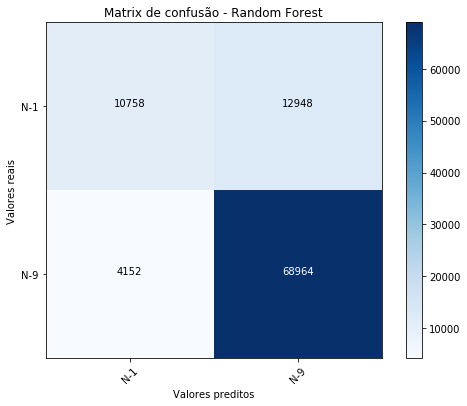

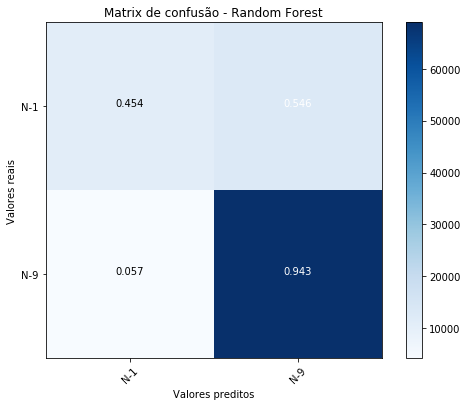

In [151]:
# encoding=utf8  
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

class_names = np.array(['N-1', 'N-9'])

yvalid = y_validate 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion de matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matrix de confusão normalizada")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, ('%.3f' % cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    else:
        print('Matrix de confusão, sem normalização')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    print(cm)

    plt.tight_layout()
    plt.ylabel('Valores reais')
    plt.xlabel('Valores preditos')

# Compute confusion matrix
cnf_matrix = confusion_matrix(yvalid, rfc_y_pred_v)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix de confusão - Random Forest')
fig.set_size_inches(w=7,h=6)

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix de confusão - Random Forest')
fig_name = 'CF_figs/cmB_RF.png'
fig.set_size_inches(w=7,h=6)
fig.savefig(fig_name)

plt.show()

---

## Support Vector Machine RBF

In [153]:
from sklearn import svm, datasets

print 'Processing time SVM'
%time svm_rbf = svm.SVC(kernel='rbf', gamma=0.2, C=6, decision_function_shape='ovr').fit(X_train_std, y_train)

print ''
print 'Predict time'  
%time rbf_y_pred = svm_rbf.predict(X_test_std)
from sklearn.metrics import accuracy_score

print ('SVM-RBF accuracy:---------->%.2f %%' % (accuracy_score(y_test, rbf_y_pred)*100))

In [154]:
accuracy_score(y_test, rbf_y_pred)

0.7834499181425807

In [155]:
print 'Predict time'  
%time rbf_y_pred_v = svm_rbf.predict(X_validate_std)
from sklearn.metrics import accuracy_score
print ('SVM-RBF accuracy:---------->%.2f %%' % (accuracy_score(y_validate, rbf_y_pred_v)*100))

In [157]:
(accuracy_score(y_validate, rbf_y_pred_v))

0.7648881452562434

In [158]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, rbf_y_pred_v)
confusion_matrix = confusion_matrix.astype('float')
confusion_matrix
cm = confusion_matrix
cm

array([[ 4762., 18944.],
       [ 3820., 69296.]])

# Confusion Matrix

In [159]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, rbf_y_pred_v)
confusion_matrix = confusion_matrix.astype('float')

In [160]:
confusion_matrix

array([[ 4762., 18944.],
       [ 3820., 69296.]])

In [161]:
FN = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FP = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [162]:
TPR*100 # Sensitivity

array([55.49, 78.53])

In [163]:
TNR*100 # Specificity

array([78.53, 55.49])

In [164]:
PPV*100 # Precision

array([20.09, 94.78])

In [165]:
ACC*100 # Accuracy

array([76.49, 76.49])

In [166]:
sum(ACC)/2*100

76.48881452562433

In [167]:
#print ('Sensitivity %.2f%%' %(sum(TPR)/4*100))
#print ('Specificity %.2f%%' %(sum(TNR)/4*100))
#print ('Precision %.2f%%' %(sum(PPV)/4*100))
#print ('Accuray %.2f%%' %(sum(ACC)/4*100))

print ('Sensitivity %.2f%%' %(sum(TPR)/2*100))
print ('Specificity %.2f%%' %(sum(TNR)/2*100))
print ('Precision %.2f%%' %(sum(PPV)/2*100))
print ('Accuray %.2f%%' %(sum(ACC)/2*100))

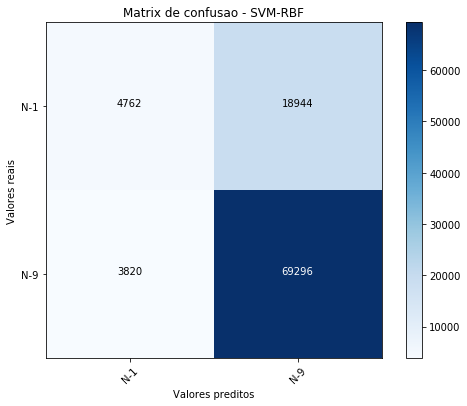

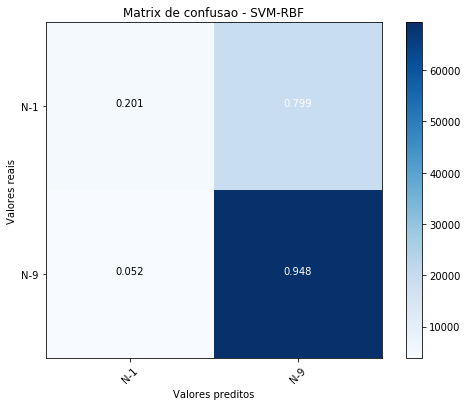

In [168]:
# encoding=utf8  
#import sys  
#reload(sys)  
#sys.setdefaultencoding('utf8')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

#%matplotlib notebook
class_names = np.array(['N-1', 'N-9'])

yvalid = y_validate 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion de matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matrix de confusão normalizada")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, ('%.3f' % cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    else:
        print('Matrix de confusão, sem normalização')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    print(cm)

    plt.tight_layout()
    plt.ylabel('Valores reais')
    plt.xlabel('Valores preditos')

# Compute confusion matrix
cnf_matrix = confusion_matrix(yvalid, rbf_y_pred_v)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix de confusao - SVM-RBF')
fig.set_size_inches(w=7,h=6)

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix de confusao - SVM-RBF')
fig_name = 'CF_figs/cmB_SVM-RBF.png'
fig.set_size_inches(w=7,h=6)
fig.savefig(fig_name)

plt.show()

## Support Vector Machine Poly

In [ ]:
from sklearn import svm, datasets

print 'Processing time Polynomial'
#%time svm = svm.SVC(kernel='poly', degree=2, coef0=4.7, C=48.9, decision_function_shape='ovr').fit(X_train_std, y_train)
%time svm_poly = svm.SVC(kernel='poly', degree=2).fit(X_train_std, y_train)


Processing time Polynomial


In [ ]:
#poly_y_pred = svm_poly.predict(X_test_std)

print 'Predict time'  
%time poly_y_pred = svm_poly.predict(X_test_std)
from sklearn.metrics import accuracy_score
print ('SVM-Polynomial accuracy:--->%.2f %%' % (accuracy_score(y_test, poly_y_pred)*100))
        

In [ ]:
print 'Predict time'  
%time poly_y_pred_v = svm_poly.predict(X_validate_std)
from sklearn.metrics import accuracy_score
print ('SVM-Polynomial accuracy:---------->%.2f %%' % (accuracy_score(y_validate, poly_y_pred_v)*100))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, poly_y_pred_v)
confusion_matrix = confusion_matrix.astype('float')
confusion_matrix
cm = confusion_matrix
cm

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, poly_y_pred_v)
confusion_matrix = confusion_matrix.astype('float')

In [ ]:
confusion_matrix

In [ ]:
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
TPR*100 # Sensitivity

In [ ]:
TNR*100 # Specificity

In [ ]:
PPV*100 # Precision

In [ ]:
ACC*100 # Accuracy

In [ ]:
sum(ACC)/6*100

In [ ]:
# encoding=utf8  
#import sys  
#reload(sys)  
#sys.setdefaultencoding('utf8')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

#%matplotlib notebook
class_names = np.array(['N-0', 'N-1', 'N-2', 'N-3', 'N-4', 'N-1,5'])

yvalid = y_validate 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion de matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matrix de confusão normalizada")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, ('%.3f' % cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    else:
        print('Matrix de confusão, sem normalização')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    print(cm)

    plt.tight_layout()
    plt.ylabel('Valores reais')
    plt.xlabel('Valores preditos')

# Compute confusion matrix
cnf_matrix = confusion_matrix(yvalid, poly_y_pred_v)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix de confusao - SVM-Poly')
fig.set_size_inches(w=7,h=6)

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix de confusao - SVM-Poly')
fig_name = 'CF_figs/cmB_SVM-Poly.png'
fig.set_size_inches(w=7,h=6)
fig.savefig(fig_name)

plt.show()

---

## KNeigbors

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=2, weights = 'distance', algorithm = 'auto', p = 1)
knc = knc.fit(X_train_std, y_train)
print''

print 'Predict time'
%time pred = knc.predict(X_test_std)

print''

from sklearn.metrics import accuracy_score



print ('ClassifyKN accuracy:---------->%.2f %%' % (accuracy_score(y_test, pred)*100))

In [81]:
accuracy_score(y_test, pred)*100

70.42095014099111

In [82]:
%time pred = knc.predict(X_validate_std)
accuracy_score(y_validate, pred)*100

40.215143949442144

## Confusion Matrix

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, y_pred)
confusion_matrix = confusion_matrix.astype('float')

In [84]:
confusion_matrix

array([[  2.73e+04,   4.75e+03,   2.00e+01,   3.09e+03,   1.06e+03,
          3.72e+03],
       [  1.06e+04,   1.60e+03,   6.00e+00,   3.57e+03,   2.53e+03,
          5.70e+03],
       [  3.58e+04,   5.48e+03,   2.60e+01,   4.52e+03,   3.18e+03,
          4.96e+03],
       [  1.57e+04,   2.55e+03,   1.10e+01,   6.00e+03,   2.24e+03,
          3.45e+03],
       [  4.22e+04,   6.18e+03,   2.60e+01,   1.75e+04,   8.46e+03,
          2.16e+04],
       [  2.57e+04,   2.89e+03,   1.10e+01,   1.80e+04,   4.18e+03,
          1.31e+04]])

In [85]:
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [86]:
TPR*100 # Sensitivity

array([  6.83e+01,   6.68e+00,   4.82e-02,   2.00e+01,   8.81e+00,
         2.05e+01])

In [87]:
TNR*100 # Specificity

array([ 51.45,  92.3 ,  99.97,  83.21,  93.76,  83.83])

In [88]:
PPV*100 # Precision

array([ 17.34,   6.82,  26.  ,  11.41,  39.04,  24.97])

In [89]:
ACC*100 # Accuracy

array([ 53.64,  85.63,  82.45,  77.06,  67.26,  70.68])

In [90]:
sum(ACC)/6*100

72.784951410019673

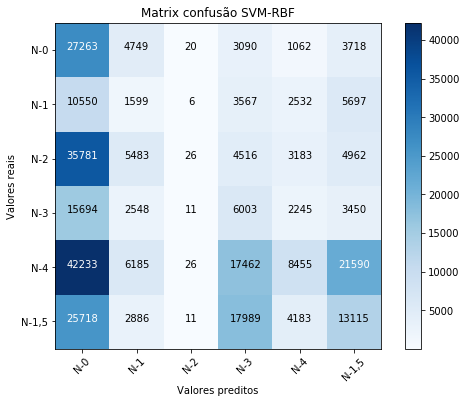

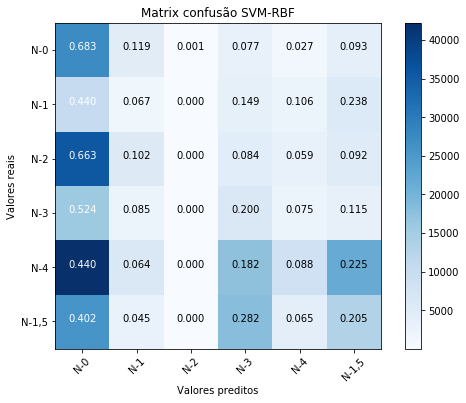

In [91]:
# encoding=utf8  
#import sys  
#reload(sys)  
#sys.setdefaultencoding('utf8')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

#%matplotlib notebook
class_names = np.array(['N-0', 'N-1', 'N-2', 'N-3', 'N-4', 'N-1,5'])

yvalid = y_validate 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matrix confusão normalizada")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, ('%.3f' % cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    else:
        print('Matrix confusão, sem normalização')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    print(cm)

    plt.tight_layout()
    plt.ylabel('Valores reais')
    plt.xlabel('Valores preditos')

# Compute confusion matrix
cnf_matrix = confusion_matrix(yvalid, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix confusao SVM-RBF')
fig.set_size_inches(w=7,h=6)

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix confusao SVM-RBF')
fig_name = 'cmB_SVM-RBF.png'
fig.set_size_inches(w=7,h=6)
fig.savefig(fig_name)

plt.show()